In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as mp
import seaborn as sns

In [47]:
movie_path = r"C:\Users\uzair\OneDrive\Desktop\updated_clean_combined_movies.csv"
movies_df = pd.read_csv(movie_path)

print(movie_path)

C:\Users\uzair\OneDrive\Desktop\updated_clean_combined_movies.csv


## Number of Movies by Genre in all Platforms ##

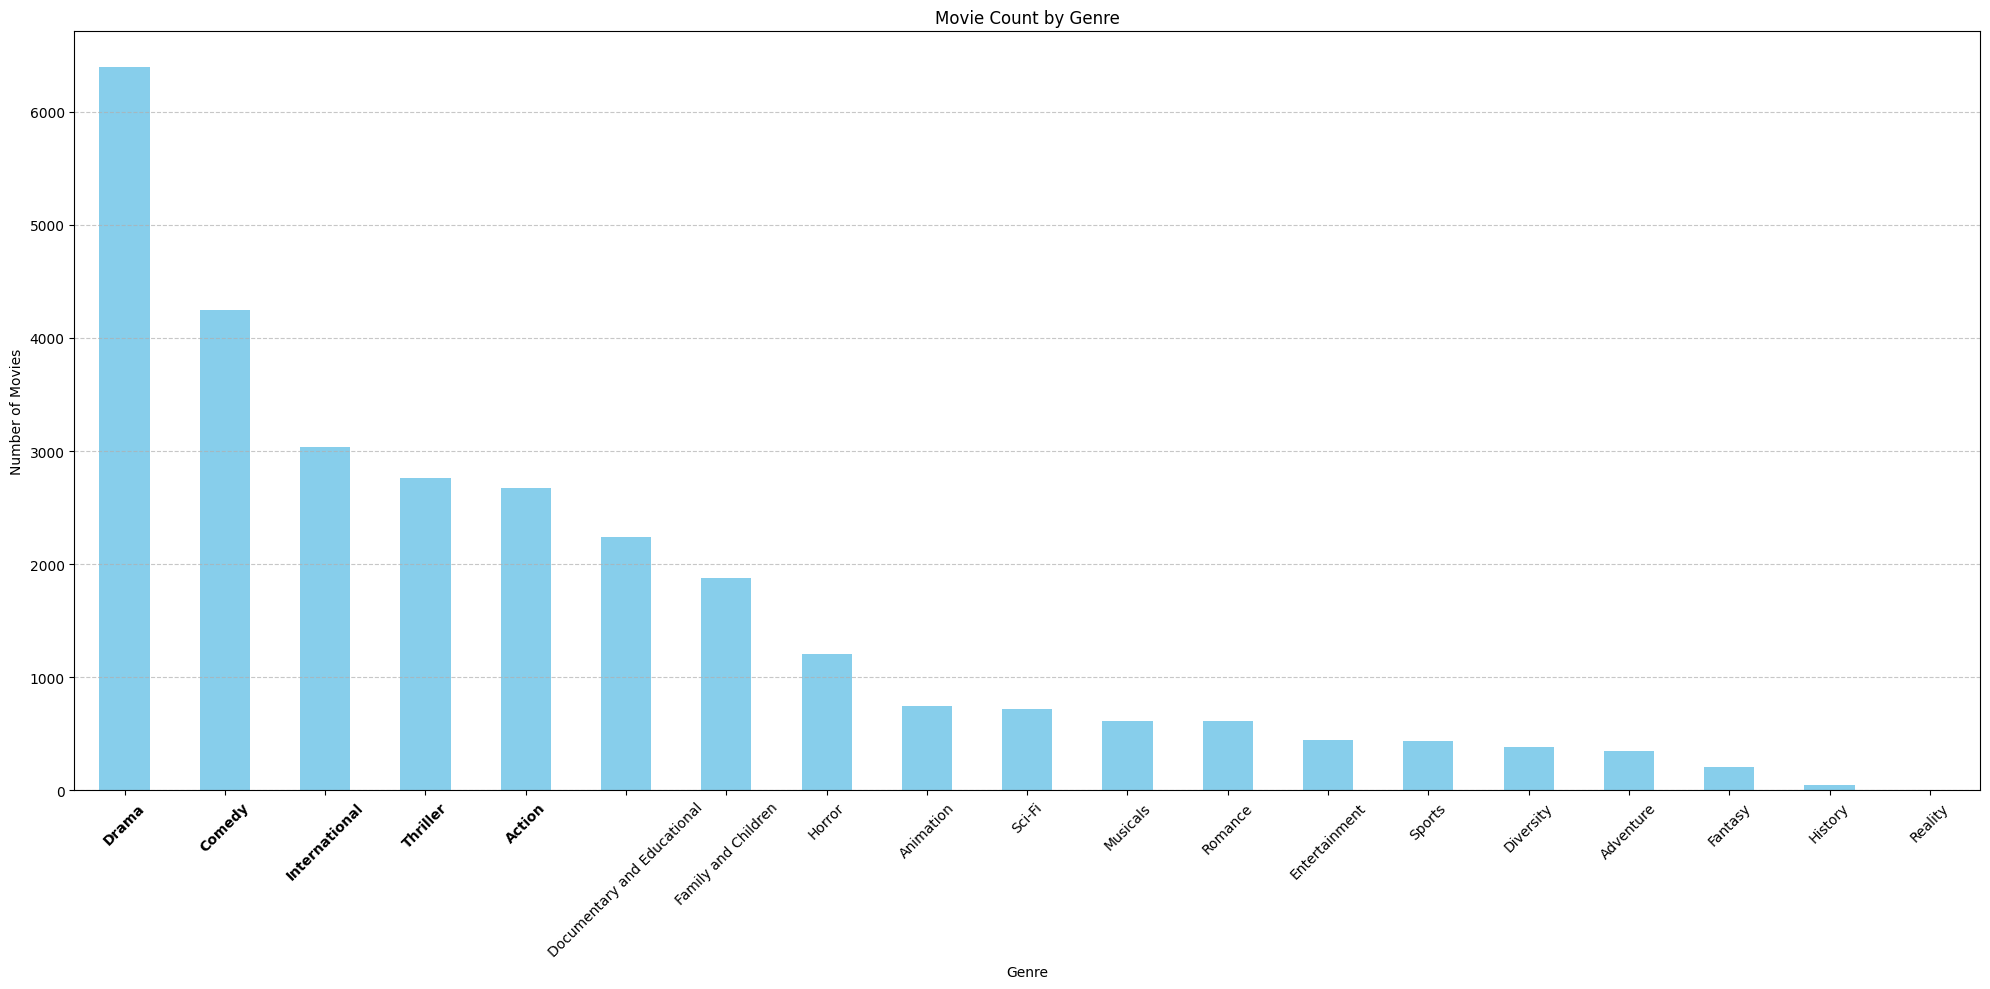

In [48]:
movies_df = movies_df.assign(genre=movies_df['genre'].str.split(', ')).explode('genre')
movies_genre_counts = movies_df['genre'].value_counts()

# Define colors for top 5 genres and other genres
top_5_colors = ['skyblue' for genre in movies_genre_counts.index]

# Plotting all genres
plt.figure(figsize=(20, 10))

bars = movies_genre_counts.plot(kind='bar', color=top_5_colors)

# Adding labels and titles
plt.title('Movie Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Make the front of the top 5 x-axis labels bold
for label in plt.gca().get_xticklabels():
    if label.get_text() in movies_genre_counts.head(5).index:
        label.set_weight('bold')

plt.show()


## Top 5 Genres in each Platform ##

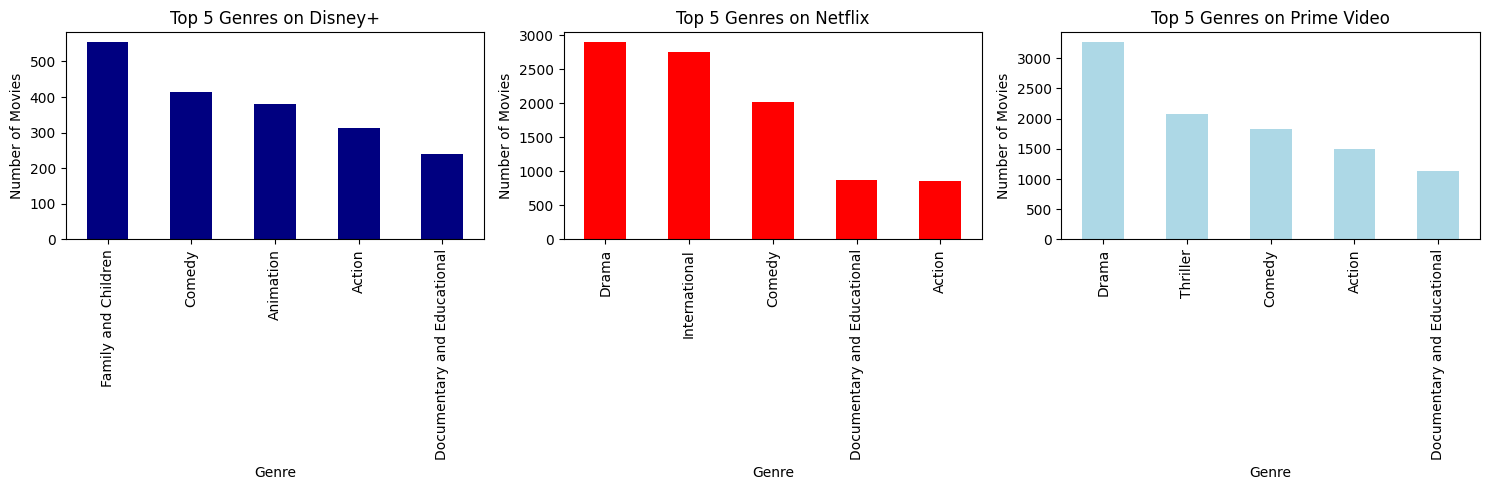

In [49]:
# Function to plot top 5 genres for a given platform
def plot_top5_genres(ax, df, platform, color):
    if not df.empty:
        top_genres = df['genre'].value_counts().nlargest(5)
        top_genres.plot(kind='bar', ax=ax, color=[color]*5)  # Set the color for each bar
        ax.set_title(f'Top 5 Genres on {platform}')
        ax.set_xlabel('Genre')
        ax.set_ylabel('Number of Movies')
    else:
        ax.set_title(f'No data available for {platform}')
        ax.axis('off')  # Turn off the axis if no data is available

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Filter data for each platform
disney_df = movies_df[movies_df['platform'] == 'Disney+']
netflix_df = movies_df[movies_df['platform'] == 'Netflix']
prime_video_df = movies_df[movies_df['platform'] == 'Prime Video']  # Adjust column name if needed

# Plot for Disney+
plot_top5_genres(axes[0], disney_df, 'Disney+', color='navy')

# Plot for Netflix
plot_top5_genres(axes[1], netflix_df, 'Netflix', color='red')

# Plot for Prime Video
plot_top5_genres(axes[2], prime_video_df, 'Prime Video', color='lightblue')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


## Age Rating Distribution by Genre In Total & Individual by Platform ##

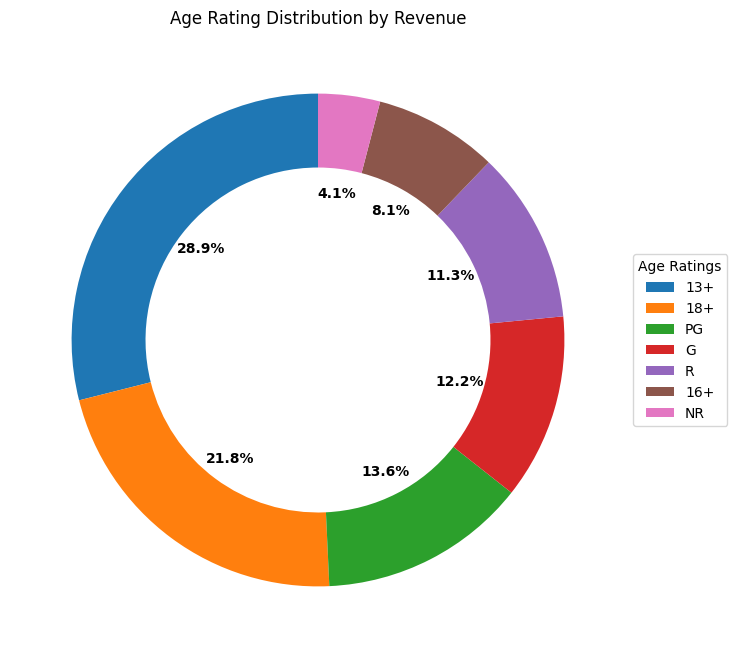

In [89]:
# Filter out 'NR' and 'Miscellaneous'
filtered_df = movies_df[~movies_df['age_rating'].isin(['Miscellaneous'])]

# Calculate the number of movies for each Age Rating
age_rating_counts = filtered_df['age_rating'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Outer Ring: Age Rating
wedges, texts, autotexts = ax.pie(age_rating_counts, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

plt.setp(autotexts, size=10, weight="bold")

# Add legend
ax.legend(wedges, age_rating_counts.index, title="Age Ratings", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plot Title
ax.set_title("Age Rating Distribution by Revenue")

plt.show()


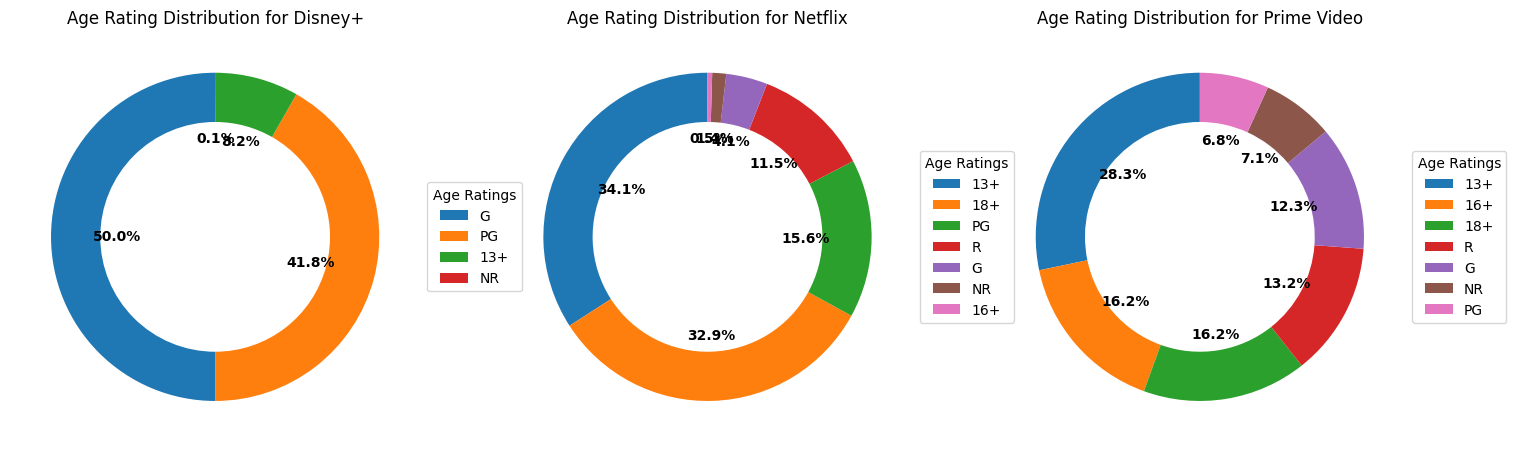

In [68]:

# Filter out 'NR' and 'Miscellaneous'
filtered_df = movies_df[~movies_df['age_rating'].isin(['Miscellaneous'])]

# Create subplots for Disney+, Netflix, and Prime Video
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Define platforms
platforms = ['Disney+', 'Netflix', 'Prime Video']
platform_dfs = [movies_df[movies_df['platform'] == platform] for platform in platforms]

for ax, platform_df, platform in zip(axes, platform_dfs, platforms):
    # Calculate the number of movies for each Age Rating
    age_rating_counts = platform_df['age_rating'].value_counts()

    # Plot
    wedges, texts, autotexts = ax.pie(age_rating_counts, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
    plt.setp(autotexts, size=10, weight="bold")

    # Add legend
    ax.legend(wedges, age_rating_counts.index, title="Age Ratings", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Plot Title
    ax.set_title(f"Age Rating Distribution for {platform}")

plt.show()


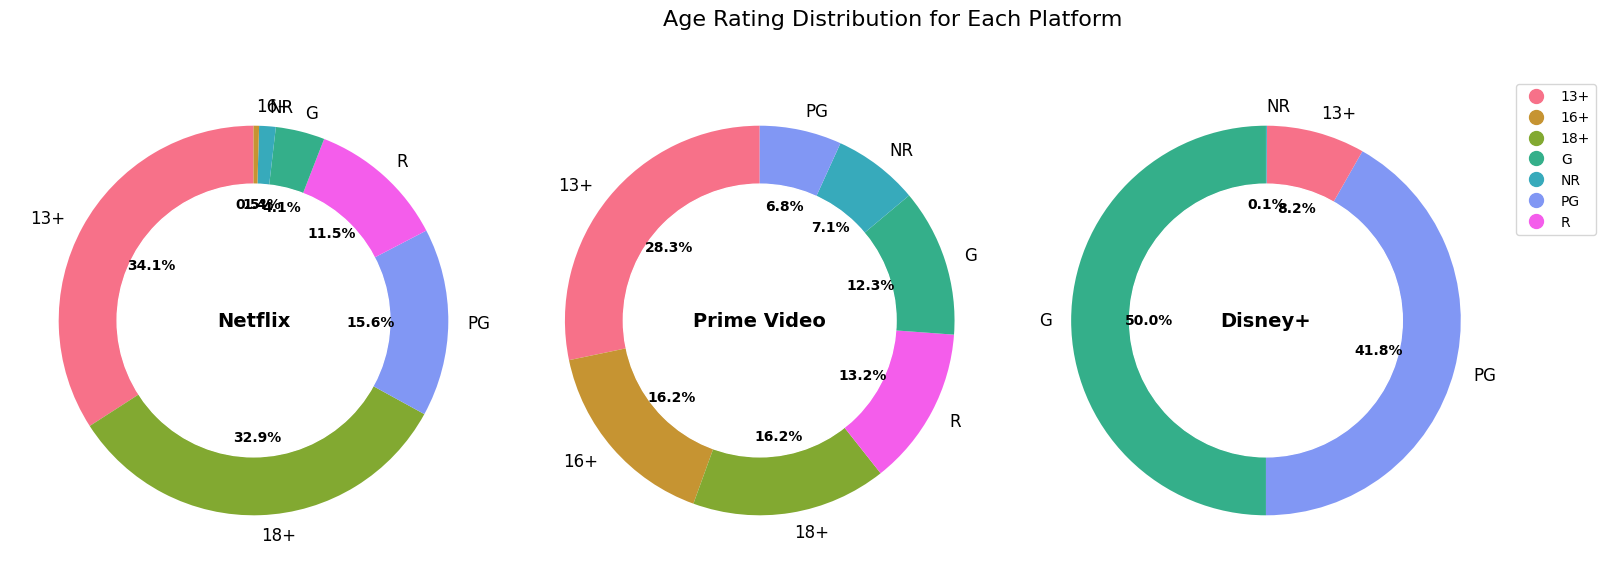

In [73]:
# Define the data preparation function for age ratings
def prepare_pie_data_age(df):
    age_rating_counts = df['age_rating'].value_counts()
    return age_rating_counts

# Prepare the data for pie charts for age ratings
netflix_age_data = prepare_pie_data_age(netflix_df)
prime_video_age_data = prepare_pie_data_age(prime_video_df)
disney_plus_age_data = prepare_pie_data_age(disney_df)

# Combine all age ratings from the three platforms
all_age_ratings = netflix_age_data.index.union(prime_video_age_data.index).union(disney_plus_age_data.index)

# Generate a color palette for all unique age ratings across platforms
unique_colors_age = sns.color_palette('husl', n_colors=len(all_age_ratings))
age_rating_colors = dict(zip(all_age_ratings, unique_colors_age))

# Updated function to create a pie chart with age rating labels and percentages
def create_pie_chart_age(data, ax, platform):
    wedges, texts, autotexts = ax.pie(data, labels=data.index, autopct='%1.1f%%', 
                                     colors=[age_rating_colors[age_rating] for age_rating in data.index],
                                     startangle=90, wedgeprops=dict(width=0.3), textprops={'fontsize': 12})
    
    # Center text
    ax.text(0, 0, f"{platform}", ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Donut chart
    centre_circle = plt.Circle((0, 0), 0.70, color='white')
    ax.add_artist(centre_circle)
    
    # Adjust autotext labels
    plt.setp(autotexts, size=10, weight="bold")

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create pie charts for age ratings
create_pie_chart_age(netflix_age_data, axs[0], 'Netflix')
create_pie_chart_age(prime_video_age_data, axs[1], 'Prime Video')
create_pie_chart_age(disney_plus_age_data, axs[2], 'Disney+')

# Create the legend for age ratings
patch_list_age = [plt.plot([], [], marker="o", ms=10, ls="", mec=None, color=age_rating_colors[age_rating], 
                 label="{:s}".format(age_rating))[0] for age_rating in age_rating_colors]

# Adjust the position of the legend
# Move it to the right of the plots, vertically centered
plt.legend(handles=patch_list_age, loc='upper left', bbox_to_anchor=(1, 1))

# Set a central title for the entire figure
fig.suptitle('Age Rating Distribution for Each Platform', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])  # Adjust the layout
plt.show()


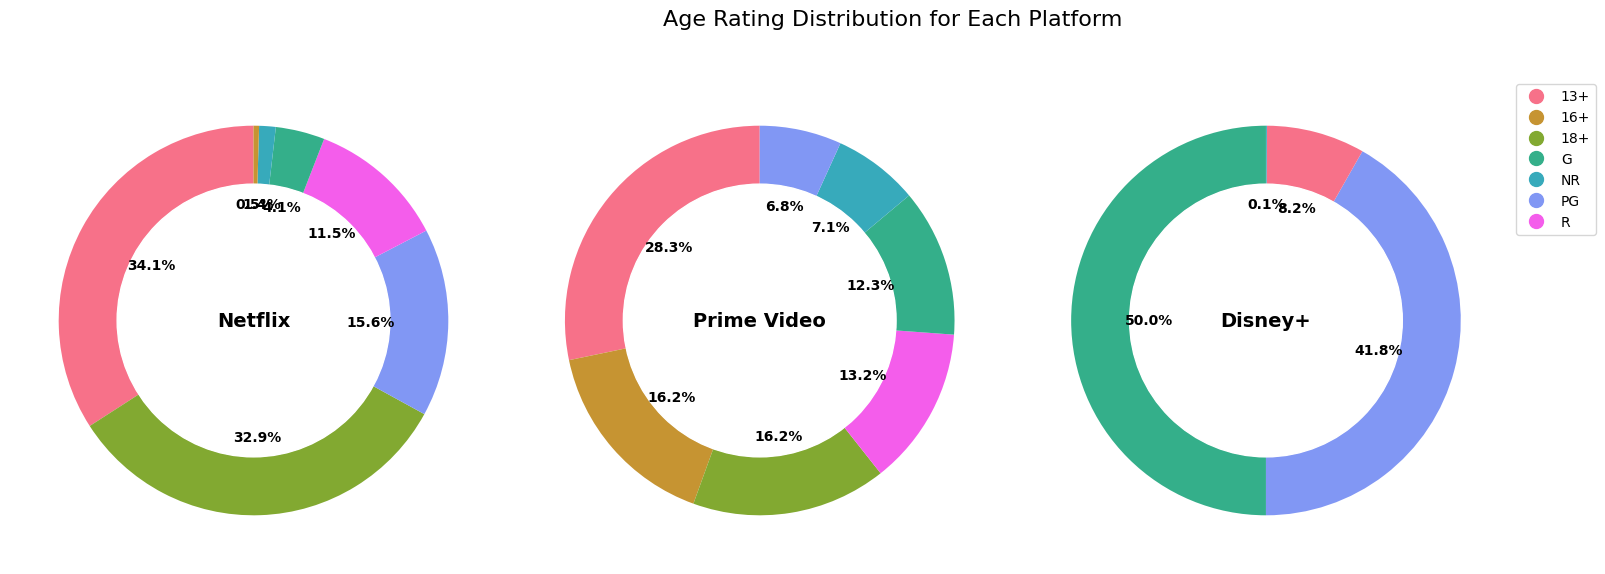

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'movies_df' is your DataFrame

# Define the data preparation function for age ratings
def prepare_pie_data_age(df):
    age_rating_counts = df['age_rating'].value_counts()
    return age_rating_counts

# Prepare the data for pie charts for age ratings
netflix_age_data = prepare_pie_data_age(netflix_df)
prime_video_age_data = prepare_pie_data_age(prime_video_df)
disney_plus_age_data = prepare_pie_data_age(disney_df)

# Combine all age ratings from the three platforms
all_age_ratings = netflix_age_data.index.union(prime_video_age_data.index).union(disney_plus_age_data.index)

# Generate a color palette for all unique age ratings across platforms
unique_colors_age = sns.color_palette('husl', n_colors=len(all_age_ratings))
age_rating_colors = dict(zip(all_age_ratings, unique_colors_age))

# Updated function to create a pie chart without age rating labels
def create_pie_chart_age(data, ax, platform):
    wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%', 
                                     colors=[age_rating_colors[age_rating] for age_rating in data.index],
                                     startangle=90, wedgeprops=dict(width=0.3), textprops={'fontsize': 12})
    
    # Center text
    ax.text(0, 0, f"{platform}", ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Donut chart
    centre_circle = plt.Circle((0, 0), 0.70, color='white')
    ax.add_artist(centre_circle)
    
    # Adjust autotext labels
    plt.setp(autotexts, size=10, weight="bold")

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create pie charts for age ratings
create_pie_chart_age(netflix_age_data, axs[0], 'Netflix')
create_pie_chart_age(prime_video_age_data, axs[1], 'Prime Video')
create_pie_chart_age(disney_plus_age_data, axs[2], 'Disney+')

# Create the legend for age ratings
patch_list_age = [plt.plot([], [], marker="o", ms=10, ls="", mec=None, color=age_rating_colors[age_rating], 
                 label="{:s}".format(age_rating))[0] for age_rating in age_rating_colors]

# Adjust the position of the legend
# Move it to the right of the plots, vertically centered
plt.legend(handles=patch_list_age, loc='upper left', bbox_to_anchor=(1, 1))

# Set a central title for the entire figure
fig.suptitle('Age Rating Distribution for Each Platform', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])  # Adjust the layout
plt.show()


NameError: name 'np' is not defined

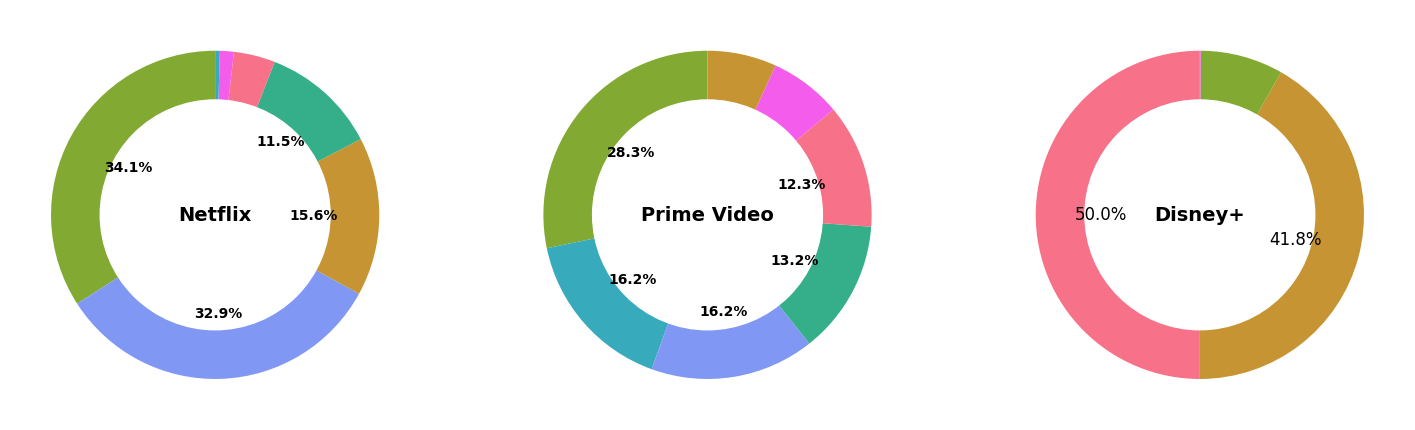

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'movies_df' is your DataFrame

# Define the data preparation function for age ratings
def prepare_pie_data_age(df):
    age_rating_counts = df['age_rating'].astype(pd.CategoricalDtype(categories=['G', 'PG', '13+', 'R', '16+', '18+', 'NR'], ordered=True)).value_counts()
    return age_rating_counts

# Prepare the data for pie charts for age ratings
netflix_age_data = prepare_pie_data_age(netflix_df)
prime_video_age_data = prepare_pie_data_age(prime_video_df)
disney_plus_age_data = prepare_pie_data_age(disney_df)

# Combine all age ratings from the three platforms
all_age_ratings = netflix_age_data.index.union(prime_video_age_data.index).union(disney_plus_age_data.index)

# Generate a color palette for all unique age ratings across platforms
unique_colors_age = sns.color_palette('husl', n_colors=len(all_age_ratings))
age_rating_colors = dict(zip(all_age_ratings, unique_colors_age))

# Updated function to create a pie chart with percentage numbers outside for segments under 10%
def create_pie_chart_age(data, ax, platform):
    wedges, texts, autotexts = ax.pie(data, autopct=lambda p: '{:.1f}%'.format(p) if p >= 10 else '',
                                     colors=[age_rating_colors[age_rating] for age_rating in data.index],
                                     startangle=90, wedgeprops=dict(width=0.3), textprops={'fontsize': 12})
    
    # Center text
    ax.text(0, 0, f"{platform}", ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Donut chart
    centre_circle = plt.Circle((0, 0), 0.70, color='white')
    ax.add_artist(centre_circle)
    
    # Display percentage numbers outside the donut for segments under 10%
    for autotext, percentage in zip(autotexts, data):
        if percentage < 10:
            autotext.set_visible(True)
            autotext.set_position((0.7 * np.cos(np.pi/180 * (autotext.theta2 - autotext.theta1) / 2),
                                   0.7 * np.sin(np.pi/180 * (autotext.theta2 - autotext.theta1) / 2)))
    
    # Adjust autotext labels
    plt.setp(autotexts, size=10, weight="bold")


# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create pie charts for age ratings
create_pie_chart_age(netflix_age_data, axs[0], 'Netflix')
create_pie_chart_age(prime_video_age_data, axs[1], 'Prime Video')
create_pie_chart_age(disney_plus_age_data, axs[2], 'Disney+')

# Create the legend for age ratings
patch_list_age = [plt.plot([], [], marker="o", ms=10, ls="", mec=None, color=age_rating_colors[age_rating], 
                 label="{:s}".format(age_rating))[0] for age_rating in age_rating_colors]

# Adjust the position of the legend
# Move it to the right of the plots, vertically centered
plt.legend(handles=patch_list_age, loc='upper left', bbox_to_anchor=(1, 1))

# Set a central title for the entire figure
fig.suptitle('Age Rating Distribution for Each Platform', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])  # Adjust the layout
plt.show()
